In [3]:
from dictlearn import DictionaryLearning
from dictlearn import methods

import numpy as np
from matplotlib import image, pyplot as plt
from sklearn.feature_extraction.image import extract_patches_2d
from sklearn.feature_extraction.image import reconstruct_from_patches_2d
from sklearn.preprocessing import normalize

In [4]:
p = 8  # dimensiunea unui patch
s = 6  # sparsitatea
N = 1000  # nr total de patch-uri
n = 256  # nr de atomi din dictionar
K = 50  # nr de iteratii DL
sigma = 0.075  # deviatia standard a zgomotului

## 1.

### a)

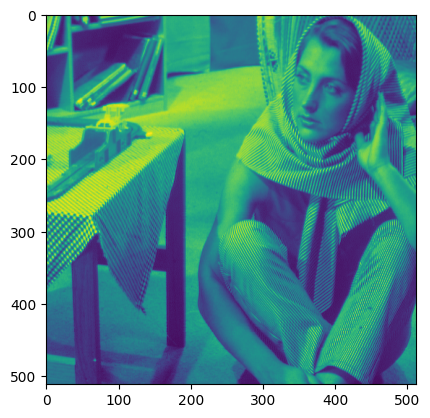

In [19]:
I = image.imread('barbara.png')
plt.imshow(I)

### b)

In [6]:
Inoisy = I + sigma * np.random.randn(I.shape[0],I.shape[1])

### c)

In [7]:
Ynoisy = extract_patches_2d(Inoisy, (p, p))
print(Ynoisy.shape)

Ynoisy = Ynoisy.reshape(Ynoisy.shape[0], -1)
print(Ynoisy.shape)

Ynoisy = Ynoisy.T

mean = np.mean(Ynoisy, 0)
Ynoisy = Ynoisy - mean

(255025, 8, 8)
(255025, 64)


### d)

In [8]:
patches = np.random.choice(Ynoisy.shape[1], N)
Y = Ynoisy[:, patches]
print(Y)

[[ 0.06555568 -0.07051375  0.04849849 ... -0.27654513  0.16143327
  -0.05406969]
 [-0.00446541 -0.08987954 -0.04944323 ... -0.24040055  0.10353561
  -0.06529626]
 [-0.00811827 -0.06476994  0.04760281 ... -0.00453927 -0.03928818
   0.15056186]
 ...
 [-0.07197356 -0.03024302  0.2058151  ...  0.0724121  -0.08512179
  -0.14446826]
 [-0.016967    0.10531011  0.21331242 ...  0.40220393  0.05416073
  -0.14434062]
 [-0.06026227  0.01068581  0.05986985 ...  0.09355643 -0.11230229
  -0.10495963]]


## 2.

### a)

In [9]:
D0 = np.random.randn(p * p, N)
D0 = normalize(D0, axis=0, norm='max')

### b)

In [10]:
dl = DictionaryLearning(
    n_components=n,
    max_iter=K,
    fit_algorithm='ksvd',
    n_nonzero_coefs=s,
    code_init=None,
    dict_init=D0,
    params=None,
    data_sklearn_compat=False
)
dl.fit(Y)
D = dl.D_

## 3.

### a)

In [11]:
Xc, err = methods.omp(Ynoisy, D, n_nonzero_coefs=s)

### b)

In [12]:
Yc = np.matmul(D, Xc) + mean
print(Yc.shape)

(64, 255025)


### c)

In [13]:
Yc = Yc.reshape((8, 8, Yc.shape[1]))
Yc = np.transpose(Yc, (2, 0, 1))
Ic = reconstruct_from_patches_2d(Yc, (I.shape[0], I.shape[1]))

## 4.

### a)

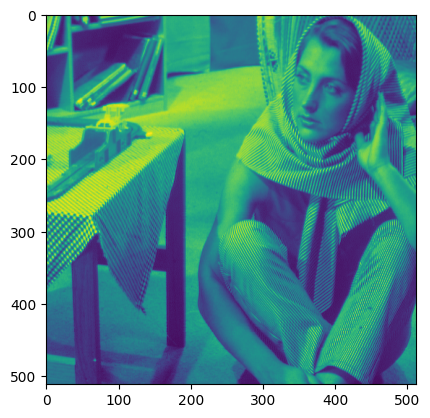

In [18]:
plt.imshow(I)

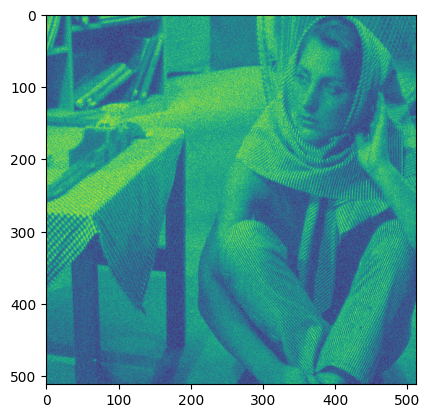

In [16]:
plt.imshow(Inoisy)

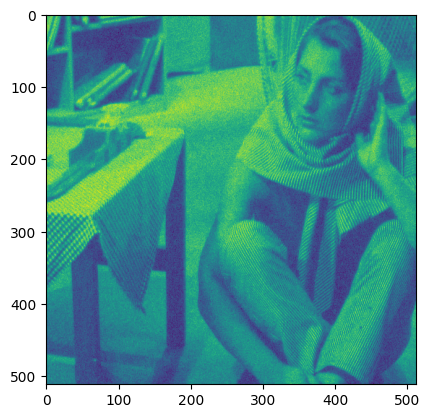

In [17]:
plt.imshow(Ic)

### b)

In [15]:
def psnr(i1, i2):
    mse = np.mean((i1 - i2) ** 2)
    if mse == 0:
        return 0
    max_pixel = 255
    res = 20 * np.log10(max_pixel / np.sqrt(mse))
    return res

psnr1 = psnr(I, Inoisy)
psnr2 = psnr(I, Ic)

print(psnr1, psnr2)

# psnr2 > psnr1, deci metoda si-a indeplinit scopul

70.61760830612548 73.95556583995128
